In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from skimage.measure import block_reduce
import sys
sys.path.insert(0,'..')
from dataloader import DataLoaderDALES, DataLoaderMicroHH
from functions import vint

In [2]:
# LOADING

lp = '../../bomex200_e12/ppagg_qlnew'
sp = lp+'/../figs'
mod = 'dales'

if mod == 'dales':
    dl = DataLoaderDALES(lp+'/..')
elif mod == 'microhh':
    dl = DataLoaderMicroHH(lp+'/..')
    
time1d = dl.time1d
rhobf = dl.rhobf

# Larger-scale processes
zf_inp = dl.zf_inp
wfls = dl.wfls
dqdt_ls = dl.dqdt_ls
dthldt_ls = dl.dthldt_ls

time = np.load(lp+'/time.npy')
plttime = np.load(lp+'/plttime.npy')
zflim = np.load(lp+'/zf.npy')

dzh = np.diff(zflim)[0] # FIXME only valid in lower part of domain

izmin = np.where(zflim[0] == zf_inp)[0][0]
izmax = np.where(zflim[-1] == zf_inp)[0][0]+1

qtpf_moist_time = np.load(lp+'/qtpf_moist_time.npy')
qtpf_dry_time = np.load(lp+'/qtpf_dry_time.npy')
qtpf_prod_moist_time = np.load(lp+'/qtpf_prod_moist_time.npy')
qtpf_prod_dry_time = np.load(lp+'/qtpf_prod_dry_time.npy')
qtpf_prod_moist_wex_time = np.load(lp+'/qtpf_prod_moist_wex_time.npy')
qtpf_prod_dry_wex_time = np.load(lp+'/qtpf_prod_dry_wex_time.npy')
qtpf_vdiv_moist_time = np.load(lp+'/qtpf_vdiv_moist_time.npy')
qtpf_vdiv_dry_time = np.load(lp+'/qtpf_vdiv_dry_time.npy')
qtpf_hdiv_moist_time = np.load(lp+'/qtpf_hdiv_moist_time.npy')
qtpf_hdiv_dry_time = np.load(lp+'/qtpf_hdiv_dry_time.npy')
qtpf_subs_moist_time = np.load(lp+'/qtpf_subs_moist_time.npy')
qtpf_subs_dry_time = np.load(lp+'/qtpf_subs_dry_time.npy')
qtpf_diff_moist_time = np.load(lp+'/qtpf_diff_moist_time.npy')
qtpf_diff_dry_time = np.load(lp+'/qtpf_diff_dry_time.npy')

thlvpf_moist_time = np.load(lp+'/thlvpf_moist_time.npy')
thlvpf_dry_time = np.load(lp+'/thlvpf_dry_time.npy')
thlvpf_prod_moist_time = np.load(lp+'/thlvpf_prod_moist_time.npy')
thlvpf_prod_dry_time = np.load(lp+'/thlvpf_prod_dry_time.npy')
thlvpf_vdiv_moist_time = np.load(lp+'/thlvpf_vdiv_moist_time.npy')
thlvpf_vdiv_dry_time = np.load(lp+'/thlvpf_vdiv_dry_time.npy')
thlvpf_hdiv_moist_time = np.load(lp+'/thlvpf_hdiv_moist_time.npy')
thlvpf_hdiv_dry_time = np.load(lp+'/thlvpf_hdiv_dry_time.npy')
thlvpf_subs_moist_time = np.load(lp+'/thlvpf_subs_moist_time.npy')
thlvpf_subs_dry_time = np.load(lp+'/thlvpf_subs_dry_time.npy')
thlvpf_diff_moist_time = np.load(lp+'/thlvpf_diff_moist_time.npy')
thlvpf_diff_dry_time = np.load(lp+'/thlvpf_diff_dry_time.npy')

thlvpp_moist_time = np.load(lp+'/thlvpp_moist_time.npy')
thlvpp_dry_time = np.load(lp+'/thlvpp_dry_time.npy')
thlvpp_prod_moist_time = np.load(lp+'/thlvpp_prod_moist_time.npy')
thlvpp_prod_dry_time = np.load(lp+'/thlvpp_prod_dry_time.npy')
thlvpp_vdiv_moist_time = np.load(lp+'/thlvpp_vdiv_moist_time.npy')
thlvpp_vdiv_dry_time = np.load(lp+'/thlvpp_vdiv_dry_time.npy')
thlvpp_hdiv_moist_time = np.load(lp+'/thlvpp_hdiv_moist_time.npy')
thlvpp_hdiv_dry_time = np.load(lp+'/thlvpp_hdiv_dry_time.npy')
thlvpp_subs_moist_time = np.load(lp+'/thlvpp_subs_moist_time.npy')
thlvpp_subs_dry_time = np.load(lp+'/thlvpp_subs_dry_time.npy')
thlvpp_diff_moist_time = np.load(lp+'/thlvpp_diff_moist_time.npy')
thlvpp_diff_dry_time = np.load(lp+'/thlvpp_diff_dry_time.npy')

wthlvpf_prod_moist_time = np.load(lp+'/wthlvpf_prod_moist_time.npy')
wthlvpf_prod_dry_time =  np.load(lp+'/wthlvpf_prod_dry_time.npy')
wthlvpf_vdiv_moist_time =  np.load(lp+'/wthlvpf_vdiv_moist_time.npy')
wthlvpf_vdiv_dry_time = np.load(lp+'/wthlvpf_vdiv_dry_time.npy')
wthlvpf_hdiv_moist_time = np.load(lp+'/wthlvpf_hdiv_moist_time.npy')
wthlvpf_hdiv_dry_time = np.load(lp+'/wthlvpf_hdiv_dry_time.npy')
wthlvpf_buoy_moist_time = np.load(lp+'/wthlvpf_buoy_moist_time.npy')
wthlvpf_buoy_dry_time = np.load(lp+'/wthlvpf_buoy_dry_time.npy')
wthlvpf_pres_moist_time = np.load(lp+'/wthlvpf_pres_moist_time.npy')
wthlvpf_pres_dry_time = np.load(lp+'/wthlvpf_pres_dry_time.npy')
wthlvpf_subs_moist_time = np.load(lp+'/wthlvpf_subs_moist_time.npy')
wthlvpf_subs_dry_time = np.load(lp+'/wthlvpf_subs_dry_time.npy')
wthlvpf_diff_moist_time = np.load(lp+'/wthlvpf_diff_moist_time.npy')
wthlvpf_diff_dry_time = np.load(lp+'/wthlvpf_diff_dry_time.npy')

qlpf_moist_time = np.load(lp+'/qlpf_moist_time.npy') 
qlpf_dry_time = np.load(lp+'/qlpf_dry_time.npy')
qlpf_prod_moist_time = np.load(lp+'/qlpf_prod_moist_time.npy')
qlpf_prod_dry_time = np.load(lp+'/qlpf_prod_dry_time.npy')
qlpf_vdiv_moist_time = np.load(lp+'/qlpf_vdiv_moist_time.npy')
qlpf_vdiv_dry_time = np.load(lp+'/qlpf_vdiv_dry_time.npy')
qlpf_hdiv_moist_time = np.load(lp+'/qlpf_hdiv_moist_time.npy')
qlpf_hdiv_dry_time = np.load(lp+'/qlpf_hdiv_dry_time.npy')
qlpf_subs_moist_time = np.load(lp+'/qlpf_subs_moist_time.npy')
qlpf_subs_dry_time = np.load(lp+'/qlpf_subs_dry_time.npy')
qlpf_diff_moist_time = np.load(lp+'/qlpf_diff_moist_time.npy')
qlpf_diff_dry_time = np.load(lp+'/qlpf_diff_dry_time.npy')

thl_av_time = np.load(lp+'/thl_av_time.npy')
thlv_av_time = np.load(lp+'/thlv_av_time.npy')
qt_av_time = np.load(lp+'/qt_av_time.npy')

thlpf_moist_time = np.load(lp+'/thlpf_moist_time.npy')
thlpf_dry_time = np.load(lp+'/thlpf_dry_time.npy')
wff_moist_time = np.load(lp+'/wff_moist_time.npy')
wff_dry_time = np.load(lp+'/wff_dry_time.npy')

thlpp_moist_time = np.load(lp+'/thlpp_moist_time.npy')
thlpp_dry_time = np.load(lp+'/thlpp_dry_time.npy')
wfp_moist_time = np.load(lp+'/wfp_moist_time.npy')
wfp_dry_time = np.load(lp+'/wfp_dry_time.npy')
qlpp_moist_time = np.load(lp+'/qlpp_moist_time.npy') 
qlpp_dry_time = np.load(lp+'/qlpp_dry_time.npy')

wthlp_av_time = np.load(lp+'/wthlp_av_time.npy')
wthlpf_moist_time = np.load(lp+'/wthlpf_moist_time.npy')
wthlpf_dry_time = np.load(lp+'/wthlpf_dry_time.npy')

wqtp_av_time = np.load(lp+'/wqtp_av_time.npy')
wqtpf_moist_time = np.load(lp+'/wqtpf_moist_time.npy')
wqtpf_dry_time = np.load(lp+'/wqtpf_dry_time.npy')

wqlp_av_time = np.load(lp+'/wqlp_av_time.npy')
wqlpf_moist_time = np.load(lp+'/wqlpf_moist_time.npy')
wqlpf_dry_time = np.load(lp+'/wqlpf_dry_time.npy')
wqlpf_l_moist_time = np.load(lp+'/wqlpf_l_moist_time.npy')
wqlpf_l_dry_time = np.load(lp+'/wqlpf_l_dry_time.npy')
wqlpf_c_moist_time = np.load(lp+'/wqlpf_c_moist_time.npy')
wqlpf_c_dry_time = np.load(lp+'/wqlpf_c_dry_time.npy')
wqlpf_r_moist_time = np.load(lp+'/wqlpf_r_moist_time.npy')
wqlpf_r_dry_time = np.load(lp+'/wqlpf_r_dry_time.npy')

wthlvp_av_time = np.load(lp+'/wthlvp_av_time.npy')
wthlvpf_moist_time = np.load(lp+'/wthlvpf_moist_time.npy')
wthlvpf_dry_time = np.load(lp+'/wthlvpf_dry_time.npy')
wthlvpf_l_moist_time = np.load(lp+'/wthlvpf_l_moist_time.npy')
wthlvpf_l_dry_time = np.load(lp+'/wthlvpf_l_dry_time.npy')
wthlvpf_c_moist_time = np.load(lp+'/wthlvpf_c_moist_time.npy')
wthlvpf_c_dry_time = np.load(lp+'/wthlvpf_c_dry_time.npy')
wthlvpf_r_moist_time = np.load(lp+'/wthlvpf_r_moist_time.npy')
wthlvpf_r_dry_time = np.load(lp+'/wthlvpf_r_dry_time.npy')
wthlvpp_moist_time = np.load(lp+'/wthlvpp_moist_time.npy')
wthlvpp_dry_time = np.load(lp+'/wthlvpp_dry_time.npy')

# Flux anomaly
wthlvpf_moist_anom = wthlvpf_moist_time - wthlvp_av_time
wthlvpf_dry_anom = wthlvpf_dry_time - wthlvp_av_time

# Buoyancy approximation
thvpf_moist_time = thlvpf_moist_time + 7*thl_av_time*qlpf_moist_time
thvpf_dry_time = thlvpf_dry_time + 7*thl_av_time*qlpf_dry_time

# Mean ql (we don't have this from stats3d)
ql_av_1d = dl.load_qlav(izmin, izmax)
ql_interp = interp1d(time1d/3600,ql_av_1d,axis=0)
ql_av_time = ql_interp(time)

# Reference pressure and constants
pref_1d = dl.load_presh(0,izmin, izmax+1)
pref_1d = (pref_1d[1:] + pref_1d[:-1])*0.5
exnf = (pref_1d/1e5)**(2./7.)
Lv = 2.5e6
cp = 1004

# Slopes of mean profiles
Gamma_thlv = thlvpf_prod_moist_time/wff_moist_time[:,1:-1]
Gamma_qt = qtpf_prod_moist_wex_time/wff_moist_time[:,1:-1]

# Tendencies of variables of interest
def tderive(var,time):
    return ((var[1:,1:-1] - var[:-1,1:-1])
           /(time[1:,np.newaxis] - time[:-1,np.newaxis])/3600)


qtpf_tend_moist_time = np.zeros(qtpf_prod_moist_time.shape)
qtpf_tend_dry_time = np.zeros(qtpf_prod_moist_time.shape)
qtpf_tend_moist_time[1:,:] = tderive(qtpf_moist_time, time)
qtpf_tend_dry_time[1:,:] = tderive(qtpf_dry_time, time)

thlvpf_tend_moist_time = np.zeros(thlvpf_prod_moist_time.shape)
thlvpf_tend_dry_time = np.zeros(thlvpf_prod_moist_time.shape)
thlvpf_tend_moist_time[1:,:] = tderive(thlvpf_moist_time, time)
thlvpf_tend_dry_time[1:,:] = tderive(thlvpf_dry_time, time)

wthlvpf_tend_moist_time = np.zeros(wthlvpf_prod_moist_time.shape)
wthlvpf_tend_dry_time = np.zeros(wthlvpf_prod_moist_time.shape)
wthlvpf_tend_moist_time[1:,:] = tderive(wthlvpf_moist_anom, time)
wthlvpf_tend_dry_time[1:,:] = tderive(wthlvpf_dry_anom, time)


## Reconstruct slab-mean budget terms

thl_av_1d = dl.load_thlav(izmin, izmax)
qt_av_1d = dl.load_qtav(izmin, izmax)
thlv_av_1d = thl_av_1d*(1 + 0.608*qt_av_1d)

# Tendencies
ddt_thl_av_time = tderive(thl_av_1d, time1d/3600)
ddt_thlv_av_time = tderive(thlv_av_1d, time1d/3600)
ddt_qt_av_time = tderive(qt_av_1d, time1d/3600)
ddt_ql_av_time = tderive(ql_av_1d, time1d/3600)

# Flux divergence (approximately, i.e. ignoring rho)
wthl_av = dl.load_wthlav(izmin, izmax)
wqt_av = dl.load_wqtav(izmin, izmax)
wql_av = dl.load_wqlav(izmin, izmax)
wthlv_av = wthl_av + 0.608*thl_av_1d*wqt_av

ddz_wthl_av_time = ((wthl_av[:,1:] - wthl_av[:,:-1])/dzh)
ddz_wthlv_av_time = ((wthlv_av[:,1:] - wthlv_av[:,:-1])/dzh)
ddz_wqt_av_time = ((wqt_av[:,1:] - wqt_av[:,:-1])/dzh)
ddz_wql_av_time = ((wql_av[:,1:] - wql_av[:,:-1])/dzh)

ddz_wthl_av_time = (ddz_wthl_av_time[:,1:] + ddz_wthl_av_time[:,:-1])*0.5
ddz_wthlv_av_time = (ddz_wthlv_av_time[:,1:] + ddz_wthlv_av_time[:,:-1])*0.5
ddz_wqt_av_time = (ddz_wqt_av_time[:,1:] + ddz_wqt_av_time[:,:-1])*0.5
ddz_wql_av_time = (ddz_wql_av_time[:,1:] + ddz_wql_av_time[:,:-1])*0.5

# Subsidence
Gamma_thl_1d = (thl_av_1d[:,1:] - thl_av_1d[:,:-1])/dzh
Gamma_thl_1d = (Gamma_thl_1d[:,1:] + Gamma_thl_1d[:,:-1])/2.

Gamma_thlv_1d = (thlv_av_1d[:,1:] - thlv_av_1d[:,:-1])/dzh
Gamma_thlv_1d = (Gamma_thlv_1d[:,1:] + Gamma_thlv_1d[:,:-1])/2.

Gamma_qt_1d = (qt_av_1d[:,1:] - qt_av_1d[:,:-1])/dzh
Gamma_qt_1d = (Gamma_qt_1d[:,1:] + Gamma_qt_1d[:,:-1])/2.

Gamma_ql_1d = (ql_av_1d[:,1:] - ql_av_1d[:,:-1])/dzh
Gamma_ql_1d = (Gamma_ql_1d[:,1:] + Gamma_ql_1d[:,:-1])/2.

wfls_dthldz_av_time = wfls[izmin+1:izmax-1]*Gamma_thl_1d
wfls_dthlvdz_av_time = wfls[izmin+1:izmax-1]*Gamma_thlv_1d
wfls_dqtdz_av_time = wfls[izmin+1:izmax-1]*Gamma_qt_1d
wfls_dqldz_av_time = wfls[izmin+1:izmax-1]*Gamma_ql_1d

# Large scale warming
dthldt_ls = dthldt_ls[izmin:izmax]
dqdt_ls = dqdt_ls[izmin:izmax]
dthlvdt_ls = dthldt_ls + 0.608*thl_av_1d*dqdt_ls

Initialising dataloader...
Set paths to all datasets and extracted dimensions


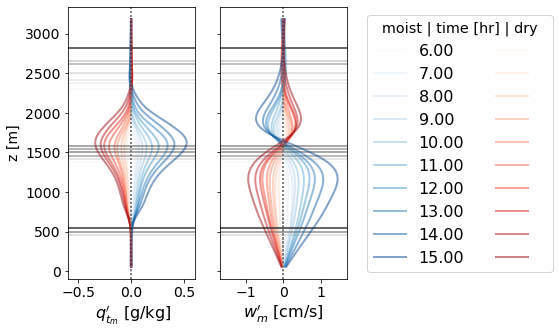

In [3]:
#%% Plotprofiles of  mesoscale-filtered variables in time
tpltmin = 6.
tpltmax = 16.
dit = 1.0 # Rounds to closest multiple of dt in time
dtav = 1.0 # Around each plotted time step
alpha = 0.5
lw=2
fm = 1e3 # convert kg/kg -> g/kg
fw = 1e2 # convert m/s -> cm/s

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1
idtplt = int(round(dit/(time[plttime[1]]-time[plttime[0]])))
idtav  = int(round(dtav/2/(time[1]-time[0])))
idtav1 = int(round(dtav/2/(time1d[1]-time1d[0])*3600))
plttime_var = np.arange(itpltmin,itpltmax,idtplt)

def add_twinx(ax, norm, offset, label, return_axs=False):
    ax2 = ax.twiny()
    ax2.xaxis.set_ticks_position('top')
    ax2.xaxis.set_label_position('top')
    ax2.spines['top'].set_position(('axes',offset))
    ax2.set_xlim((ax.get_xlim()[0]/norm,ax.get_xlim()[1]/norm))
    ax2.set_xlabel(label)
    if return_axs:
        return ax2

ax2offs=1.0
fig,axs = plt.subplots(ncols=2,sharey=True,figsize=(5,5))
# fig.suptitle('Averages over moist and dry mesoscale regions')
for i in range(len(plttime_var)):
    ti = time[plttime_var[i]]
    
    colm = plt.cm.Blues(i/len(plttime_var))
    cold = plt.cm.Reds(i/len(plttime_var))
    colc = plt.cm.Greys(i/len(plttime_var))
    
    it1d = np.argmin(abs(ti-time1d/3600))
    
    ql_avi = np.mean(ql_av_1d[it1d-idtav1:it1d+idtav1],axis=0)
    z_cb = zflim[ql_avi>0][1]
    
    z_ib = zflim[np.argmin(np.mean(wthlv_av[it1d-idtav1:it1d+idtav1],axis=0))]
    
    z_ct = zflim[ql_avi>0][-10]
    
    axs[0].plot(np.mean(fm*qtpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim, 
                color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[0].plot(np.mean(fm*qtpf_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[0].axvline(0,color='gray',linestyle='dotted')
    axs[0].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[0].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[0].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == len(plttime_var)-1:
        axs[0].set_xlabel(r" $q_{t_m}'$ [g/kg]",fontsize=16)
        axs[0].set_xlim((-6e-4*fm,6e-4*fm))
        axs[0].tick_params(axis='both', labelsize=14)
        qt2max = np.max(np.sqrt(dl.load_qt2av(izmin,izmax)[it1d]))

    axs[1].plot(np.mean(fw*wff_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=colm,label='%.2f'%ti,linestyle='-',alpha=alpha,lw=lw)
    axs[1].plot(np.mean(fw*wff_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=cold,label=' ',linestyle='-',alpha=alpha,lw=lw)
    axs[1].axvline(0,color='gray',linestyle='dotted')
    axs[1].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[1].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[1].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == len(plttime_var)-1:
        axs[1].set_xlabel(r"$w_m'$ [cm/s]",fontsize=16)
        axs[1].set_xlim((-1.7e-2*fw,1.7e-2*fw))
        axs[1].tick_params(axis='x', labelsize=14)
        w2max = np.max(np.sqrt(dl.load_w2tav(izmin,izmax)[it1d]))

axs[0].set_ylabel('z [m]',fontsize=14)

handles, labels = axs[1].get_legend_handles_labels()
handm = handles[::2];  labsm = labels[::2]
handd = handles[1::2]; labsd = labels[1::2]
handles = np.concatenate((handm,handd))
labels  = np.concatenate((labsm,labsd))
axs[1].legend(handles, labels, loc='best',bbox_to_anchor=(1.1,1),
              ncol=2,title='moist | time [hr] | dry',fontsize=16,
              title_fontsize='x-large')
plt.savefig(sp+'/vars_meso_evo.svg', bbox_inches='tight')

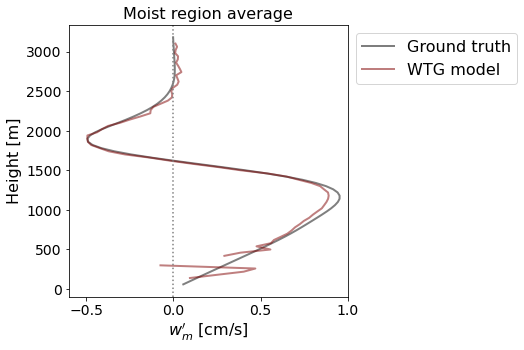

In [4]:
#%% WTG-based model of moisture variance production

tpltmin = 10.
tpltmax = 16.

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1

labels0 = ["Ground truth",
           r"WTG model",
          ]

colors = ['black',
          'maroon',
          ]
lw=2
alpha=0.5
fw = 100 # m/s => cm/s
fq = 1000*3600 # kg/kg/s => g/kg/hr
xlimw = 0.01*fw
xlimq = 8e-8*fq

# Vertical velocities

# Exact
wffmn_moist = np.mean(wff_moist_time[itpltmin:itpltmax],axis=0)
wffmn_dry = np.mean(wff_dry_time[itpltmin:itpltmax],axis=0)

# w model with actual thlvpf_vdiv (including budget residual)
thlvpf_budg_moist = (-thlvpf_prod_moist_time[:,1:-1] - thlvpf_vdiv_moist_time[:,1:-1]
                      -thlvpf_hdiv_moist_time[:,1:-1] - thlvpf_subs_moist_time[:,1:-1]
                      +thlvpf_diff_moist_time)
thlvpf_resi_moist = thlvpf_tend_moist_time[:,1:-1] -  thlvpf_budg_moist
thlvpf_vdiv_moist = thlvpf_vdiv_moist_time[:,1:-1] - thlvpf_resi_moist

thlvpf_budg_dry = (-thlvpf_prod_dry_time[:,1:-1] - thlvpf_vdiv_dry_time[:,1:-1]
                      -thlvpf_hdiv_dry_time[:,1:-1] - thlvpf_subs_dry_time[:,1:-1]
                      +thlvpf_diff_dry_time)
thlvpf_resi_dry = thlvpf_tend_dry_time[:,1:-1] -  thlvpf_budg_dry
thlvpf_vdiv_dry = thlvpf_vdiv_dry_time[:,1:-1] - thlvpf_resi_dry


wff_moist_wtg = -thlvpf_vdiv_moist/Gamma_thlv[:,1:-1]
wff_dry_wtg = -thlvpf_vdiv_dry/Gamma_thlv[:,1:-1]

wffmn_moist_wtg = np.mean(wff_moist_wtg[itpltmin:itpltmax,:],axis=0)
wffmn_dry_wtg = np.mean(wff_dry_wtg[itpltmin:itpltmax,:],axis=0)

# Set values that lie outside the plot to nan to avoid cluttering plot
wffmn_moist_wtg[np.abs(wffmn_moist_wtg)>xlimw/fw] = np.nan
wffmn_dry_wtg[np.abs(wffmn_dry_wtg)>xlimw/fw] = np.nan

# w plot
fig,axs = plt.subplots(nrows=1,ncols=1,sharey=True,figsize=(5,5),squeeze=False)
axs[0,0].plot(fw*wffmn_moist, zflim, c=colors[0],label=labels0[0],linewidth=lw,alpha=alpha)
axs[0,0].plot(fw*wffmn_moist_wtg, zflim[2:-2],label=labels0[1], c=colors[1],linewidth=lw,alpha=alpha)
axs[0,0].axvline(0,color='gray',linestyle='dotted')
axs[0,0].set_xlim((-0.6,1))
axs[0,0].set_xlabel(r"$w_m'$ [cm/s]",fontsize=16)
axs[0,0].set_title(r"Moist region average",fontsize=16)
axs[0,0].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
axs[0,0].tick_params(axis='both', labelsize=14)

axs[0,0].set_ylabel(r'Height [m]',fontsize=16)
axs[0,0].legend(loc='upper left',bbox_to_anchor=(1,1),fontsize=16)

plt.savefig(sp+'/wpf_wtg.svg',bbox_inches='tight')

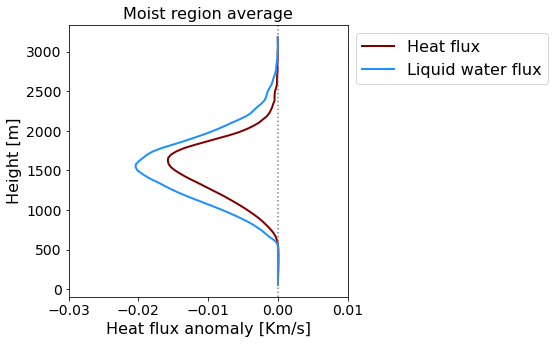

In [5]:
#%% Fluxes of wthlv

# Time to average over
tpltmin = 10.
tpltmax = 16.
dit = 1.0
dtav = 1.0 # Around each plotted time step

colors = ['maroon',
          'dodgerblue'
          ]

alpha = 1.0
lw = 2

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1

itpltmin1d = np.where(time1d>=tpltmin*3600)[0][0]
itpltmax1d = np.where(time1d<tpltmax*3600)[0][-1]+1

idtplt = int(round(dit/(time[plttime[1]]-time[plttime[0]])))
idtav  = int(round(dtav/2/(time[1]-time[0])))
plttime_var = np.arange(itpltmin,itpltmax,idtplt) #FIXME

# Contributions to wthv
wthlvpfmn_moist = np.mean(wthlvpf_moist_time[itpltmin:itpltmax,:],axis=0)
wthlvpfmn_dry = np.mean(wthlvpf_dry_time[itpltmin:itpltmax,:],axis=0)
wthlvpmn_av = np.mean(wthlvp_av_time[itpltmin:itpltmax,:],axis=0)

a3wqlpfmn_moist = np.mean(7*thl_av_time[itpltmin:itpltmax,:]*wqlpf_moist_time[itpltmin:itpltmax,:],axis=0)
a3wqlpfmn_dry = np.mean(7*thl_av_time[itpltmin:itpltmax,:]*wqlpf_dry_time[itpltmin:itpltmax,:],axis=0)
a3wqlpmn_av = np.mean(7*thl_av_1d[itpltmin1d:itpltmax1d,:]*dl.load_wqlrav(izmin,izmax)[itpltmin1d:itpltmax1d,:],axis=0)

# wthvpf plot
fig,axs = plt.subplots(nrows=1,ncols=1,sharey=True,figsize=(5,5), squeeze=False)
axs[0,0].plot(wthlvpfmn_moist-wthlvpmn_av, zflim,c=colors[0],alpha=alpha,lw=lw,label='Heat flux')
axs[0,0].plot(-(a3wqlpfmn_moist-a3wqlpmn_av), zflim,c=colors[1],alpha=alpha,lw=lw,label='Liquid water flux')
axs[0,0].set_xlabel(r"Heat flux anomaly [Km/s]",fontsize=16)
axs[0,0].set_ylabel(r'Height [m]',fontsize=16)
axs[0,0].axvline(0,color='gray',linestyle='dotted')
axs[0,0].set_xlim((-0.03,0.01))
axs[0,0].set_title('Moist region average',fontsize=16)
axs[0,0].legend(bbox_to_anchor=(1,1),loc='upper left',fontsize=16)
axs[0,0].tick_params(axis='both', labelsize=14)

plt.savefig(sp+'/wthv_decomposition.svg',bbox_inches='tight')

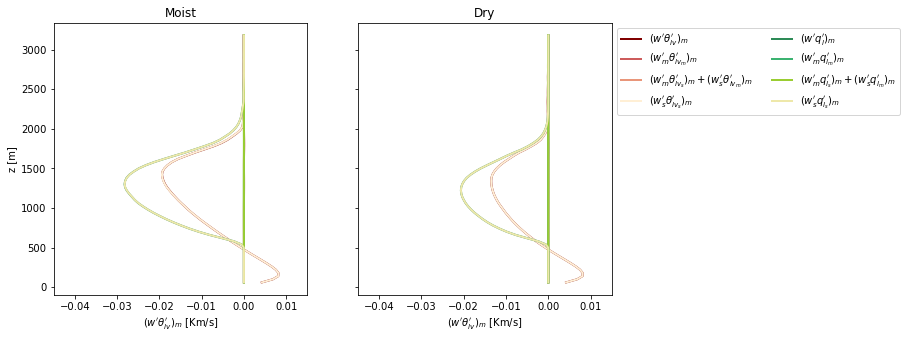

In [6]:
#%% Flux scale decomposition

# Time to average over
tpltmin = 6.
tpltmax = 10.

labs = [r"$(w'\theta_{lv}')_m$",
        r"$(w_m'\theta_{lv_m}')_m$",
        r"$(w_m'\theta_{lv_s}')_m + (w_s'\theta_{lv_m}')_m$",
        r"$(w_s'\theta_{lv_s}')_m$",
        r"$(w'q_l')_m$",
        r"$(w_m'q_{l_m}')_m$",
        r"$(w_m'q_{l_s}')_m + (w_s'q_{l_m}')_m$",
        r"$(w_s'q_{l_s}')_m$"
        ]

col = ['maroon',
       'indianred',
       'darksalmon',
       'papayawhip',
       'seagreen',
       'mediumseagreen',
       'yellowgreen',
       'palegoldenrod'
       ]

alpha = 1
lw = 2

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1

wthlvpfmn_moist = np.mean(wthlvpf_moist_time[itpltmin:itpltmax,:],axis=0)
wthlvpfmn_dry = np.mean(wthlvpf_dry_time[itpltmin:itpltmax,:],axis=0)
wthlvpfmn_l_moist = np.mean(wthlvpf_l_moist_time[itpltmin:itpltmax,:],axis=0)
wthlvpfmn_l_dry = np.mean(wthlvpf_l_dry_time[itpltmin:itpltmax,:],axis=0)
wthlvpfmn_c_moist = np.mean(wthlvpf_c_moist_time[itpltmin:itpltmax,:],axis=0)
wthlvpfmn_c_dry = np.mean(wthlvpf_c_dry_time[itpltmin:itpltmax,:],axis=0)
wthlvpfmn_r_moist = np.mean(wthlvpf_r_moist_time[itpltmin:itpltmax,:],axis=0)
wthlvpfmn_r_dry = np.mean(wthlvpf_r_dry_time[itpltmin:itpltmax,:],axis=0)

wqlpfmn_moist   = -7*np.mean((thl_av_time*wqlpf_moist_time)[itpltmin:itpltmax,:],axis=0)
wqlpfmn_dry     = -7*np.mean((thl_av_time*wqlpf_dry_time)[itpltmin:itpltmax,:],axis=0)
wqlpfmn_l_moist = -7*np.mean((thl_av_time*wqlpf_l_moist_time)[itpltmin:itpltmax,:],axis=0)
wqlpfmn_l_dry   = -7*np.mean((thl_av_time*wqlpf_l_dry_time)[itpltmin:itpltmax,:],axis=0)
wqlpfmn_c_moist = -7*np.mean((thl_av_time*wqlpf_c_moist_time)[itpltmin:itpltmax,:],axis=0)
wqlpfmn_c_dry   = -7*np.mean((thl_av_time*wqlpf_c_dry_time)[itpltmin:itpltmax,:],axis=0)
wqlpfmn_r_moist = -7*np.mean((thl_av_time*wqlpf_r_moist_time)[itpltmin:itpltmax,:],axis=0)
wqlpfmn_r_dry   = -7*np.mean((thl_av_time*wqlpf_r_dry_time)[itpltmin:itpltmax,:],axis=0)

fig,axs = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(10,5))
axs[0].plot(wthlvpfmn_moist,zflim,alpha=alpha,lw=lw,c=col[0])
axs[0].plot(wthlvpfmn_l_moist,zflim,alpha=alpha,lw=lw,c=col[1])
axs[0].plot(wthlvpfmn_c_moist,zflim,alpha=alpha,lw=lw,c=col[2])
axs[0].plot(wthlvpfmn_r_moist,zflim,alpha=alpha,lw=lw,c=col[3])
axs[0].plot(wqlpfmn_moist,zflim,alpha=alpha,lw=lw,c=col[4])
axs[0].plot(wqlpfmn_l_moist,zflim,alpha=alpha,lw=lw,c=col[5])
axs[0].plot(wqlpfmn_c_moist,zflim,alpha=alpha,lw=lw,c=col[6])
axs[0].plot(wqlpfmn_r_moist,zflim,alpha=alpha,lw=lw,c=col[7])
axs[0].set_title('Moist')
axs[0].set_ylabel('z [m]')
axs[0].set_xlabel(r"$(w'\theta_{lv}')_m$ [Km/s]")
axs[0].set_xlim((-0.045,0.015))

axs[1].plot(wthlvpfmn_dry,zflim,alpha=alpha,lw=lw,c=col[0],label=labs[0])
axs[1].plot(wthlvpfmn_l_dry,zflim,alpha=alpha,lw=lw,c=col[1],label=labs[1])
axs[1].plot(wthlvpfmn_c_dry,zflim,alpha=alpha,lw=lw,c=col[2],label=labs[2])
axs[1].plot(wthlvpfmn_r_dry,zflim,alpha=alpha,lw=lw,c=col[3],label=labs[3])
axs[1].plot(wqlpfmn_dry,zflim,alpha=alpha,lw=lw,c=col[4],label=labs[4])
axs[1].plot(wqlpfmn_l_dry,zflim,alpha=alpha,lw=lw,c=col[5],label=labs[5])
axs[1].plot(wqlpfmn_c_dry,zflim,alpha=alpha,lw=lw,c=col[6],label=labs[6])
axs[1].plot(wqlpfmn_r_dry,zflim,alpha=alpha,lw=lw,c=col[7],label=labs[7])
axs[1].set_title('Dry')
axs[1].set_xlabel(r"$(w'\theta_{lv}')_m$ [Km/s]")
axs[1].set_xlim((-0.045,0.015))
axs[1].legend(bbox_to_anchor=(1,1),loc='upper left',ncol=2)

plt.savefig(sp+'/wthvm_scale_decomposition.pdf',bbox_inches='tight')